# Programming Assignment - 1
---

## Question1 
Write a function trace1D() that finds the trace of a matrix given by a one dimensional NumPy array. You can not use the built-in function np.trace() or any other builtin function in any way. 

Display the output of the follwing
print(“Trace of the suggested matrix is: {}”.format(trace1D(np.arange(0,100,1))))

In [2]:
# import statements
import numpy as np
import math
import sys

# Write your function here
def trace1D(mat1D):
    array_len = mat1D.shape[0]
    print("You have provided an array of length ",array_len)
    n = math.ceil (math.sqrt(array_len))
    
    # Check if yoou have sufficient number of elements to form a square matrix
    if n > math.sqrt(array_len):
        # sys.exit(message) raises an exception too
        print("Please provide sufficient number of elements for a square matrix. System exit.")
        sys.exit()
    
    # Sum of the elements that will appear in the diagonal to give the trace
    # [0 1 2 3]
    # [4 5 6 7]
    # [8 9 10 11]
    # [12 13 14 15]
    # 0 + 5 + 10 + 15 = 30
    sum = 0.0
    for k in range(n):
        sum  = sum + mat1D[(k*n)+k]
    return sum
    

In [3]:
# Show the output of the following
print("Trace of the suggested matrix is: {}".format(trace1D(np.arange(0,16,1))))

You have provided an array of length  16
Trace of the suggested matrix is: 30.0


## Question 2

Read an appropriate RGB-image of your choice in a 3-D Tensor named myRGB. 

Perform the following operations on this tensor: 

(A) Pad the image by 50 pixels on all sides. This operation is akin to putting  a dark frame around the image. Display this RGB image.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

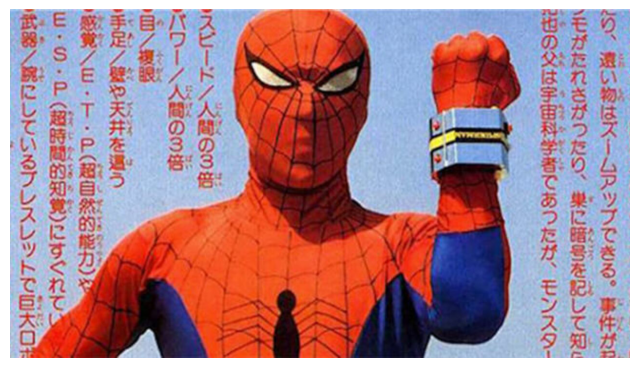

In [5]:
pix = mpimg.imread("spiderman.jpeg")

plt.figure(figsize=(8,17))
plt.axis('off')
plt.imshow(pix.astype(np.uint8))
plt.show()

In [6]:
def display_image(arr_image,color_map=None,dim=(10,20)):
    arr_image = arr_image/np.max(arr_image)
    arr_image = np.uint8(arr_image*255)
    plt.figure(figsize=dim)
    plt.axis('off')
    plt.imshow(arr_image, cmap=color_map)
    plt.show()

In [7]:
array = np.array(pix)
padded_array = np.empty([770, 1360, 3], dtype=np.uint8)
padded_array[50:770, 50:1330] = array

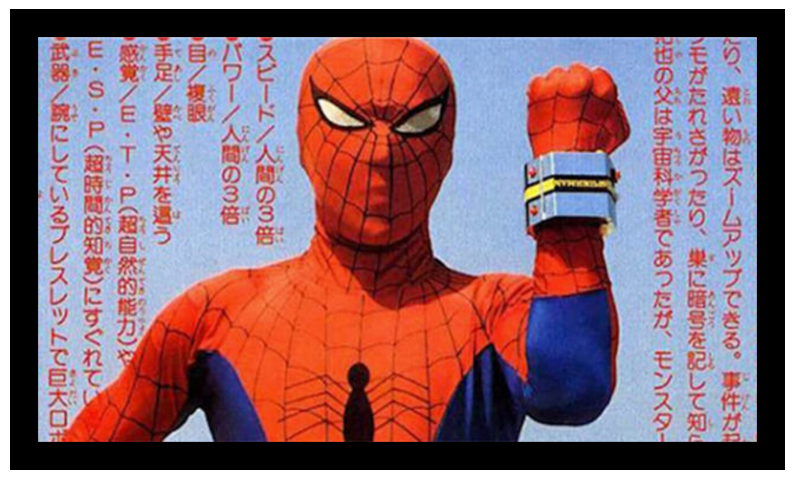

In [8]:
pad = np.pad(array, ((50, 50), (50, 50), (0, 0)))
display_image(pad)

(B) Use a sliding window of a 3x3 matrix, K (referred to as a kernel), to perform an operation called convolution on the original image. Display some of these images after convolution. 

Note that you only need to use appropriate slicing of the source image, element wise product, and np.sum in loops to perform this. 

Display the images after convolutions using K=[1 0 -1;0 0 0;-1 0 1] and K = [0 -1 0; -1 4 -1; 0 -1 0]. Describe what these convolutions have achieved. 

To know more about convolution and how to achieve it, read Section 9.2 in https://www.deeplearningbook.org/contents/convnets.html.

Here is another resource on convolution: https://developer.apple.com/library/archive/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

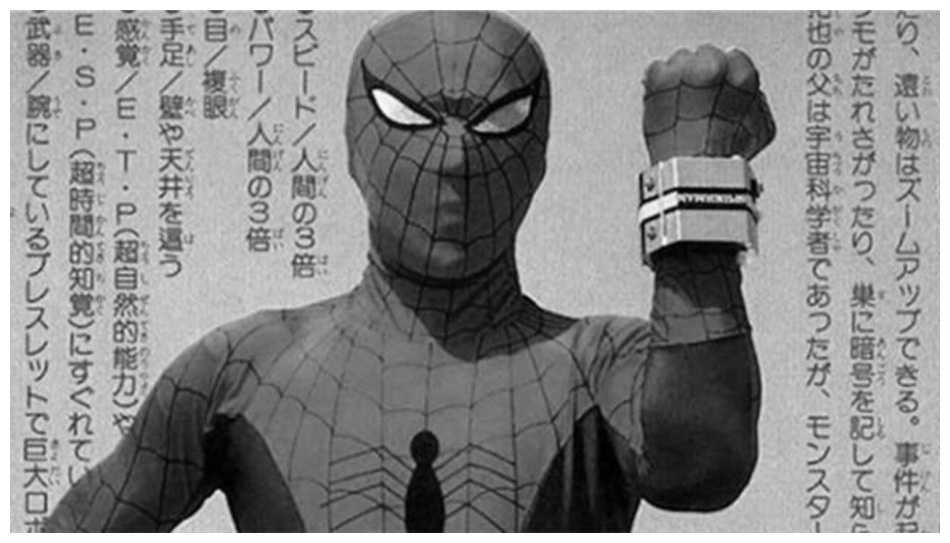

In [9]:
# Work with a B&W image from the colorimage myRGB.
color_weight = [0.2125, 0.7154, 0.0721]; # LUMA-REC.709
#color_weight = [1, 0, 0] # Try this
## Weighted sum of R, G and B pixel values is used to convert from color to black and white.
myGray = np.dot(pix[..., 0:3], color_weight) # Note conversion to gray-scale is not unique
plt.figure(figsize=(12,24))
plt.axis('off')
plt.imshow(myGray,cmap='gray')
plt.show()

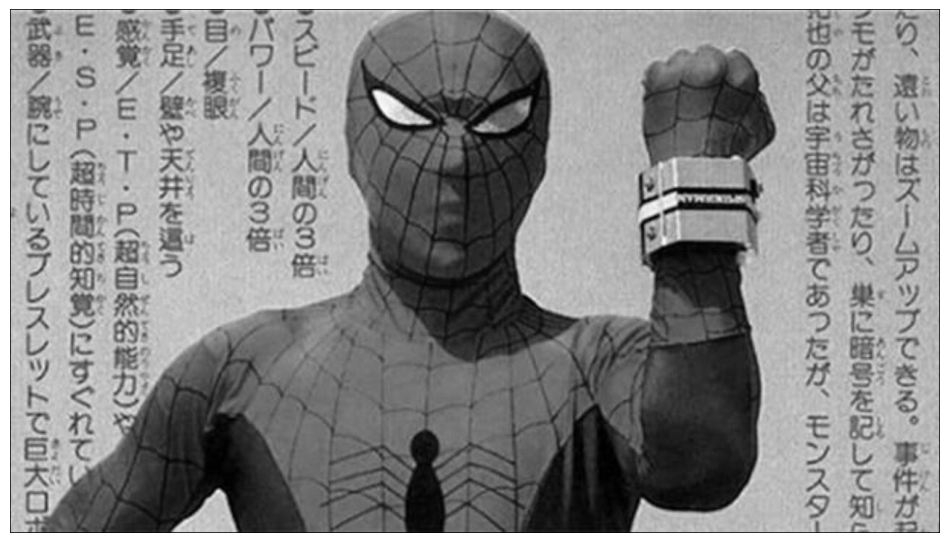

(722, 1282)

In [68]:
# Create a frame around the monochrome image
larger_size = np.add(myGray.shape, tuple([2,2]))
pix_framed = np.zeros(larger_size)
pix_framed[1:myGray.shape[0]+1, 1:myGray.shape[1]+1] = myGray
display_image(pix_framed,color_map="gray",dim=(12,24))
pix_framed.shape

In [107]:
# If the convoluted image is named myGray_conv, initialize it.
myGray_conv = np.zeros_like(myGray)

kernel_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel_2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
# Python code for convolution that needs modification by you.


In [135]:
def convolve(img, kernel):
    m, n = myGray_conv.shape
    k = kernel.shape[0]
    # 2D array of zeros
    # Added 50 to adjust for padding
    convolved_img = np.zeros(shape=(m+50, n+50))
    # Iterate over the rows
    for i in range(m):
        # Iterate over the columns
        for j in range(n):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            convolved_img[i, j] = np.sum(mat*kernel)
            
    return convolved_img

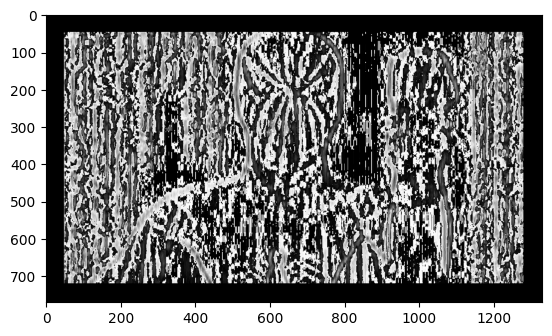

In [136]:
new_img = convolve(pad, kernel_1)
plt.imshow(new_img.astype('uint8'), cmap='gray')
plt.show()

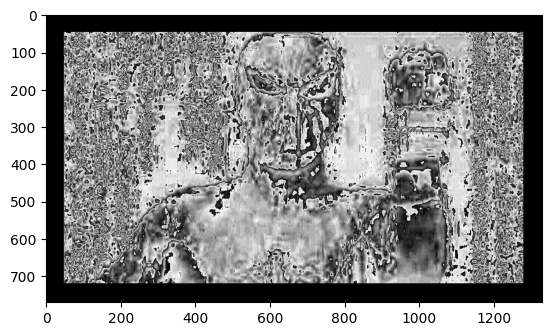

In [137]:
new_img = convolve(pad, kernel_2)
plt.imshow(new_img.astype('uint8'), cmap='gray')
plt.show()